In [3]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


ImportError: cannot import name 'get_logger' from 'logger' (/opt/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/logger/__init__.py)

In [11]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [12]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [13]:
df.sample(n = 5)

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1,Returns
282302,NXPI,2019-08-02 00:00:00+00:00,92.392502,100.459999,100.820000,97.889999,99.559998,3231300.0,2019,100.000000,0.004600
42697,AMAT,2019-05-17 00:00:00+00:00,40.222389,42.700001,44.360001,42.570000,43.349998,20218200.0,2019,41.660000,0.024964
39099,AMAT,2005-01-31 00:00:00+00:00,11.633027,15.900000,16.400000,15.880000,16.280001,39572700.0,2005,16.040001,-0.008728
197717,JBL,2009-02-17 00:00:00+00:00,4.700566,5.710000,5.980000,5.650000,5.810000,2298700.0,2009,6.100000,-0.063934
100741,CSCO,2024-07-30 00:00:00+00:00,47.451538,48.139999,48.549999,47.889999,48.189999,20166000.0,2024,47.990002,0.003126


In [14]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [16]:
df

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1,Returns
0,AAPL,2000-01-03 00:00:00+00:00,0.843077,0.999442,1.004464,0.907924,0.936384,535796800.0,2000,NaN,NaN
1,AAPL,2000-01-04 00:00:00+00:00,0.771997,0.915179,0.987723,0.903460,0.966518,512377600.0,2000,0.999442,-0.084310
2,AAPL,2000-01-05 00:00:00+00:00,0.783293,0.928571,0.987165,0.919643,0.926339,778321600.0,2000,0.915179,0.014633
3,AAPL,2000-01-06 00:00:00+00:00,0.715508,0.848214,0.955357,0.848214,0.947545,767972800.0,2000,0.928571,-0.086538
4,AAPL,2000-01-07 00:00:00+00:00,0.749401,0.888393,0.901786,0.852679,0.861607,460734400.0,2000,0.848214,0.047369
...,...,...,...,...,...,...,...,...,...,...,...
403451,ZBRA,2025-01-17 00:00:00+00:00,405.709991,405.709991,407.290009,402.290009,406.040009,270600.0,2025,402.720001,0.007424
403452,ZBRA,2025-01-21 00:00:00+00:00,418.070007,418.070007,419.850006,407.619995,407.619995,446000.0,2025,405.709991,0.030465
403453,ZBRA,2025-01-22 00:00:00+00:00,420.570007,420.570007,427.760010,419.589996,425.239990,497500.0,2025,418.070007,0.005980
403454,ZBRA,2025-01-23 00:00:00+00:00,421.109985,421.109985,422.290009,414.450012,417.619995,377100.0,2025,420.570007,0.001284


In [17]:
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((630, 11), (6304, 11))

Look at the distribution of tickers.

<Axes: xlabel='Ticker'>

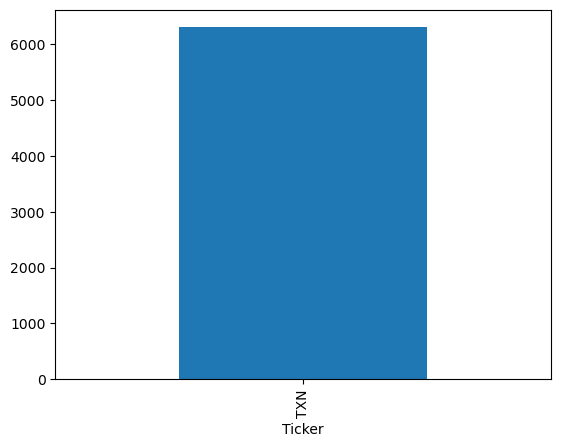

In [18]:
small_df['Ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='Ticker'>

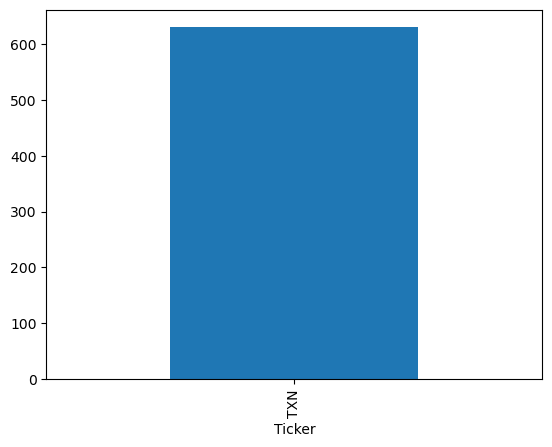

In [19]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

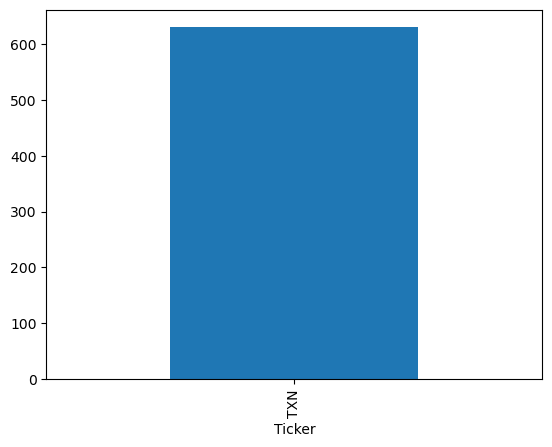

In [20]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

/var/folders/ct/7p_jm4ss0f70mkwznhhwhj340000gn/T/ipykernel_11336/2388710987.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='Ticker'>

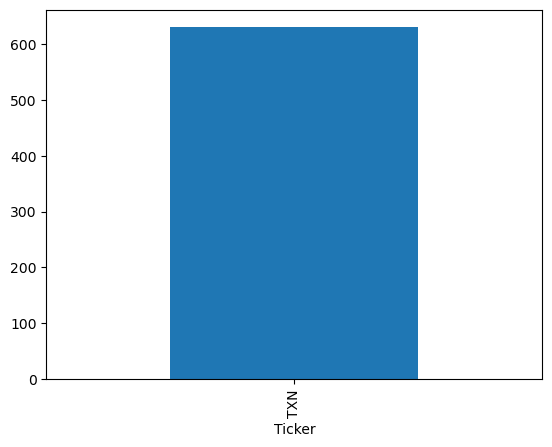

In [22]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')